In [1]:
#importo le librerie
import pandas as pd
from chefboost import Chefboost as chef
from chefboost import Chefboost as cb
import matplotlib.pyplot as plt


In [2]:
#lettura dati dal database
df=pd.read_csv('voli_train1.csv')


#visualizza il database
df.head(25)

Partenza Destinazione Compagnia  Numero di scali  Costo  Durata Decision  \
0        Roma       Londra   Ryanair                2     69     162      Yes   
1      Milano       Londra   Ryanair                0     66     190      Yes   
2        Roma       Londra   Ryanair                1     89     120      Yes   
3      Parigi         Roma   Ryanair                1    177     109       No   
4      Milano       Parigi   Ryanair                0    109     154      Yes   
5      Milano       Parigi   Ryanair                2    229     122       No   
6      Madrid       Parigi   Ryanair                0    175     201       No   
7      Milano         Roma   Ryanair                2    159     167       No   
8      Parigi       Parigi   Ryanair                1    221     125       No   
9      Milano       Parigi   Ryanair                0    182     223       No   
10  Amsterdam       Parigi   Ryanair                1     63     213       No   
11     Parigi       Londra   Ryanair                1    174     229       No   
12  Amsterdam       Parigi   Ryanair                0    104     174      Yes   
13       Roma       Parigi   Ryanair                2    141     173       No   
14     Madrid       Parigi   Ryanair                1    167     238       No   
15     Madrid         Roma   Ryanair                0    227     197       No   
16     Parigi       Parigi   Ryanair                1    199     185       No   
17    Berlino       Parigi   Ryanair                1     60     188       No   
18     Parigi       Parigi   Ryanair                2    105     227       No   
19     Madrid         Roma   Ryanair                0    120     184      Yes   
20     Milano       Londra   Ryanair                1     93     168      Yes   
21     Milano       Parigi   Ryanair                1    170     158       No   
22     Madrid       Parigi   Ryanair                0    199     173       No   
23     Londra         Roma   Ryanair                2    200     107       No   
24     Milano       Londra   Ryanair                1    145     193       No   

        Mese    Classe  
0   febbraio  business  
1   febbraio  business  
2   febbraio   economy  
3   dicembre   economy  
4   dicembre   economy  
5   febbraio   economy  
6   dicembre  business  
7   febbraio  business  
8   dicembre  business  
9   febbraio   economy  
10  dicembre   economy  
11  febbraio  business  
12  febbraio   economy  
13  febbraio   economy  
14  dicembre   economy  
15  dicembre   economy  
16  dicembre  business  
17  dicembre  business  
18  febbraio  business  
19  febbraio  business  
20  febbraio   economy  
21  febbraio  business  
22  febbraio  business  
23  dicembre  business  
24  dicembre   economy

In [3]:
#riordino le colonne del database
df = df[["Partenza","Destinazione","Compagnia","Costo", "Durata","Decision","Mese","Classe"]]
df

Partenza Destinazione Compagnia  Costo  Durata Decision      Mese  \
0         Roma       Londra   Ryanair     69     162      Yes  febbraio   
1       Milano       Londra   Ryanair     66     190      Yes  febbraio   
2         Roma       Londra   Ryanair     89     120      Yes  febbraio   
3       Parigi         Roma   Ryanair    177     109       No  dicembre   
4       Milano       Parigi   Ryanair    109     154      Yes  dicembre   
..         ...          ...       ...    ...     ...      ...       ...   
295  Amsterdam       Londra   Ryanair     75     132      Yes  febbraio   
296    Berlino         Roma   Ryanair    226     172       No  febbraio   
297  Amsterdam       Londra   Ryanair     82     143      Yes  febbraio   
298     Parigi       Parigi   Ryanair    239     206       No  dicembre   
299       Roma       Parigi   Ryanair     54     130      Yes  febbraio   

       Classe  
0    business  
1    business  
2     economy  
3     economy  
4     economy  
..        ...  
295   economy  
296  business  
297   economy  
298   economy  
299   economy  

[300 rows x 8 columns]

In [4]:

#seleziono il campione di utenza, è una select sul db
londra = df[(df["Costo"] <= 150)&(df["Classe"] =='economy')]


#visualizza
londra.head(300)

Partenza Destinazione Compagnia  Costo  Durata Decision      Mese  \
2         Roma       Londra   Ryanair     89     120      Yes  febbraio   
4       Milano       Parigi   Ryanair    109     154      Yes  dicembre   
10   Amsterdam       Parigi   Ryanair     63     213       No  dicembre   
12   Amsterdam       Parigi   Ryanair    104     174      Yes  febbraio   
13        Roma       Parigi   Ryanair    141     173       No  febbraio   
..         ...          ...       ...    ...     ...      ...       ...   
289     Parigi       Parigi   Ryanair    104     230      Yes  dicembre   
292     Londra       Parigi   Ryanair     84     213      Yes  dicembre   
295  Amsterdam       Londra   Ryanair     75     132      Yes  febbraio   
297  Amsterdam       Londra   Ryanair     82     143      Yes  febbraio   
299       Roma       Parigi   Ryanair     54     130      Yes  febbraio   

      Classe  
2    economy  
4    economy  
10   economy  
12   economy  
13   economy  
..       ...  
289  economy  
292  economy  
295  economy  
297  economy  
299  economy  

[83 rows x 8 columns]

In [5]:
#riordino di nuovo le colonne
prezzoDurata = londra[["Partenza","Costo", "Durata","Classe","Decision","Destinazione","Mese"]]
prezzoDurata.head(25)

Partenza  Costo  Durata   Classe Decision Destinazione      Mese
2        Roma     89     120  economy      Yes       Londra  febbraio
4      Milano    109     154  economy      Yes       Parigi  dicembre
10  Amsterdam     63     213  economy       No       Parigi  dicembre
12  Amsterdam    104     174  economy      Yes       Parigi  febbraio
13       Roma    141     173  economy       No       Parigi  febbraio
20     Milano     93     168  economy      Yes       Londra  febbraio
24     Milano    145     193  economy       No       Londra  dicembre
25       Roma    115     164  economy      Yes       Parigi  febbraio
29     Parigi    138     193  economy       No       Parigi  febbraio
30       Roma    103     192  economy       No       Londra  febbraio
32     Milano    113     180  economy       No       Parigi  dicembre
38       Roma     79     123  economy      Yes       Londra  febbraio
40     Madrid    102     175  economy       No       Parigi  febbraio
42     Madrid    150     170  economy       No       Parigi  dicembre
47     Parigi    116     142  economy      Yes       Londra  febbraio
48     Parigi    126     105  economy      Yes       Parigi  febbraio
49    Berlino     92     239  economy       No       Parigi  febbraio
53     Parigi     83     187  economy       No       Parigi  febbraio
54     Madrid     99     125  economy      Yes       Londra  dicembre
55     Londra     52     218  economy       No       Parigi  febbraio
62     Madrid    129     183  economy      Yes       Parigi  dicembre
64     Madrid     57     208  economy       No       Parigi  dicembre
65     Madrid    150     236  economy       No       Parigi  dicembre
75       Roma    122     126  economy      Yes       Londra  febbraio
79     Londra     86     143  economy      Yes       Parigi  febbraio

In [6]:
x=0

#seleziono le colonne necessarie dal database di nuovo per diminuirlo
#e il primo ramo dell'albero
mat=prezzoDurata.iloc[0:, 4:7]
mat.head(300)


Decision Destinazione      Mese
2        Yes       Londra  febbraio
4        Yes       Parigi  dicembre
10        No       Parigi  dicembre
12       Yes       Parigi  febbraio
13        No       Parigi  febbraio
..       ...          ...       ...
289      Yes       Parigi  dicembre
292      Yes       Parigi  dicembre
295      Yes       Londra  febbraio
297      Yes       Londra  febbraio
299      Yes       Parigi  febbraio

[83 rows x 3 columns]

In [7]:
#vado a studiare il ramo con destinazione Roma
roma1 = mat[(mat["Destinazione"] == 'Roma')]
roma = roma1[["Decision","Mese"]]
roma.head(300)


Decision      Mese
202      Yes  dicembre
224      Yes  dicembre
240       No  febbraio
248       No  dicembre
265      Yes  febbraio

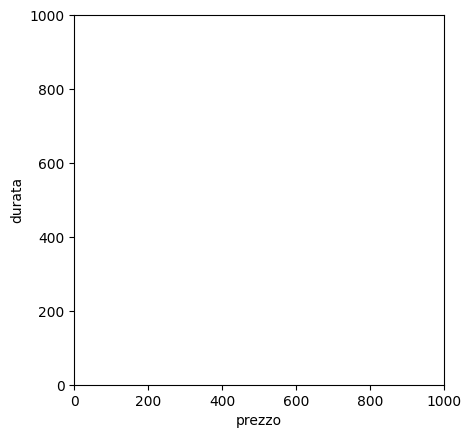

In [8]:
#grafico distribuzione voli
xpoints=mat.iloc[:,0]
ypoints=mat.iloc[:,1]
fig1, ax = plt.subplots()

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.set_xlabel("prezzo")
ax.set_ylabel("durata")
ax.set_visible("gsdgs")

ax.set_box_aspect(1)

#plt.plot(xpoints, ypoints, 'o')
#plt.show()

In [9]:
#configurazioen algoritmo chefboost chaid
config = {'algorithm': 'CHAID'}
tree = cb.fit(roma,config)



[INFO]:  4 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  0.9928817749023438  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  60.0 % on  5  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[2, 1], [1, 1]]
Precision:  66.6667 %, Recall:  66.6667 %, F1:  66.6667 %


In [10]:

# per la lettura dell'albero guardare il file outputs/rules/rules.py


Decision rule:  outputs/rules/rules.py


feature  final_importance
0    Mese               1.0

KeyError: 'importance'